In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [17]:
#%cd /gdrive/MyDrive/Colab\ Notebooks/brain_tumour_detection
#!ls

/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection
no  yes


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

PREPROCESSING DATA

In [25]:
yes_data = []

no_data = []

paths = []

labels = []

import os
for dirname, _, filenames in os.walk(r'/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/yes'):
    print(filenames)
    for filename in filenames:
       
        if '.jpg' in filename:
            
            paths.append(os.path.join(dirname, filename))

['Y182.JPG', 'Y159.JPG', 'Y154.jpg', 'Y107.jpg', 'Y188.jpg', 'Y17.jpg', 'Y166.JPG', 'Y10.jpg', 'Y162.jpg', 'Y115.JPG', 'Y195.JPG', 'Y113.JPG', 'Y105.jpg', 'Y165.JPG', 'Y106.jpg', 'Y22.jpg', 'Y116.JPG', 'Y164.JPG', 'Y158.JPG', 'Y102.jpg', 'Y13.jpg', 'Y15.jpg', 'Y18.JPG', 'Y109.JPG', 'Y24.jpg', 'Y112.JPG', 'Y153.jpg', 'Y184.JPG', 'Y169.jpg', 'Y1.jpg', 'Y101.jpg', 'Y114.JPG', 'Y155.JPG', 'Y111.JPG', 'Y20.jpg', 'Y16.JPG', 'Y157.JPG', 'Y192.JPG', 'Y23.JPG', 'Y156.JPG', 'Y181.jpg', 'Y185.jpg', 'Y12.jpg', 'Y168.jpg', 'Y186.jpg', 'Y163.JPG', 'Y11.jpg', 'Y167.JPG', 'Y180.jpg', 'Y146.JPG', 'Y117.JPG', 'Y161.JPG', 'Y2.jpg', 'Y108.jpg', 'Y187.jpg', 'Y103.jpg', 'Y148.JPG', 'Y21.jpg', 'Y194.jpg', 'Y147.JPG', 'Y120.JPG', 'Y100.JPG', 'Y19.JPG', 'Y104.jpg', 'Y170.JPG', 'Y14.jpg', 'Y160.JPG', 'Y193.JPG', 'Y183.jpg', 'Y26.jpg', 'Y56.jpg', 'Y85.JPG', 'Y258.JPG', 'Y250.jpg', 'Y257.jpg', 'Y76.jpg', 'Y253.JPG', 'Y32.jpg', 'Y60.jpg', 'Y251.JPG', 'Y58.JPG', 'Y74.jpg', 'Y75.JPG', 'Y9.jpg', 'Y73.jpg', 'Y35.jpg',

In [26]:
paths

['/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/yes/Y154.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/yes/Y107.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/yes/Y188.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/yes/Y17.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/yes/Y10.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/yes/Y162.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/yes/Y105.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/yes/Y106.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/yes/Y22.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/yes/Y102.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/yes/Y13.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/yes/Y15.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/yes/Y24.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/yes/Y153.jpg'

In [27]:
encoder = OneHotEncoder()  

encoder.fit([[0], [1]])

for path in paths:
    
    image = Image.open(path)
    
    image = image.resize((128,128))
    
    image= np.array(image)
    
    if image.shape == (128,128,3):
        
        yes_data.append(np.array(image))
        
        labels.append(encoder.transform([[0]]).toarray())
        
labels[0]

array([[1., 0.]])

In [28]:
more_paths = []

for dirname, _, filenames in os.walk(r'/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/no'):
    
    for filename in filenames:
        
        if '.jpg' in filename:
            
            more_paths.append(os.path.join(dirname, filename))

In [29]:
more_paths

['/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/no/no 8.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/no/13 no.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/no/no.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/no/no 97.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/no/6 no.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/no/N17.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/no/no 96.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/no/No18.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/no/9 no.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/no/no 10.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/no/31 no.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/no/42 no.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/no/23 no.jpg',
 '/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/no/N11.jpg',
 '/

In [30]:
for path in more_paths:
    
    image = Image.open(path)
    
    image = image.resize((128,128))
    
    image = np.array(image)
    
    if image.shape == (128,128,3):
        
        yes_data.append(np.array(image))
        
        labels.append(encoder.transform([[1]]).toarray())

In [31]:
yes_data = np.array(yes_data)

yes_data.shape

(139, 128, 128, 3)

In [32]:
labels = np.array(labels)

labels = labels.reshape(139,2)

labels.shape

(139, 2)

GETTING A GLANCE AT THE DATA 

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]
[1. 0.]


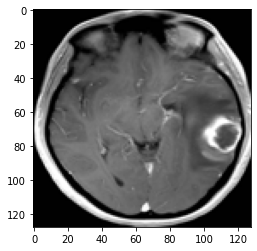

In [33]:
np.set_printoptions(linewidth = 200)

plt.imshow(yes_data[0])

print(yes_data[0])

print(labels[0])

Training/Testing data

In [34]:
train_data, test_data, train_labels, test_labels = train_test_split(yes_data, labels, random_state = 3, shuffle = True)

In [35]:
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((104, 128, 128, 3), (35, 128, 128, 3), (104, 2), (35, 2))

In [36]:
train_data = train_data /255.0
test_data = test_data/255.0

BULDING A MODEL

In [37]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization


input = Input(shape = (128,128,3))

x = Conv2D(16, (3,3), activation = 'relu')(input)

x = BatchNormalization()(x)

x = MaxPooling2D(2,2)(x)

x = Conv2D(32, (3,3), activation = 'relu')(x)

x = MaxPooling2D(2,2)(x)



x = Flatten()(x)

x = BatchNormalization()(x)

x = Dense(124, activation = 'relu')(x)

x = Dropout(0.27)(x)

x = Dense(124, activation = 'relu')(x)

output = Dense(2, activation = 'softmax')(x)

model = Model(inputs = input, outputs = output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0     

MODEL COMPILATION

In [39]:
from tensorflow.keras.optimizers import RMSprop

In [41]:
model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(learning_rate = 0.001), metrics = ["accuracy"])

In [42]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8*10**(epoch / 20))

In [43]:
history = model.fit(train_data, train_labels, epochs = 75, callbacks = [lr_schedule],validation_data = (test_data, test_labels))

Epoch 1/75
4/4 [==============================] - 4s 496ms/step - loss: 0.7961 - accuracy: 0.5481 - val_loss: 0.7015 - val_accuracy: 0.4000 - lr: 1.0000e-08
Epoch 2/75
4/4 [==============================] - 2s 418ms/step - loss: 0.7945 - accuracy: 0.5385 - val_loss: 0.7001 - val_accuracy: 0.3714 - lr: 1.1220e-08
Epoch 3/75
4/4 [==============================] - 2s 387ms/step - loss: 0.8253 - accuracy: 0.5000 - val_loss: 0.6990 - val_accuracy: 0.4286 - lr: 1.2589e-08
Epoch 4/75
4/4 [==============================] - 2s 389ms/step - loss: 0.7544 - accuracy: 0.5288 - val_loss: 0.6985 - val_accuracy: 0.4286 - lr: 1.4125e-08
Epoch 5/75
4/4 [==============================] - 2s 422ms/step - loss: 0.8404 - accuracy: 0.4904 - val_loss: 0.6991 - val_accuracy: 0.4571 - lr: 1.5849e-08
Epoch 6/75
4/4 [==============================] - 2s 420ms/step - loss: 0.8906 - accuracy: 0.4519 - val_loss: 0.7004 - val_accuracy: 0.4286 - lr: 1.7783e-08
Epoch 7/75
4/4 [==============================] - 2s 433ms

PLOTTING RESULT

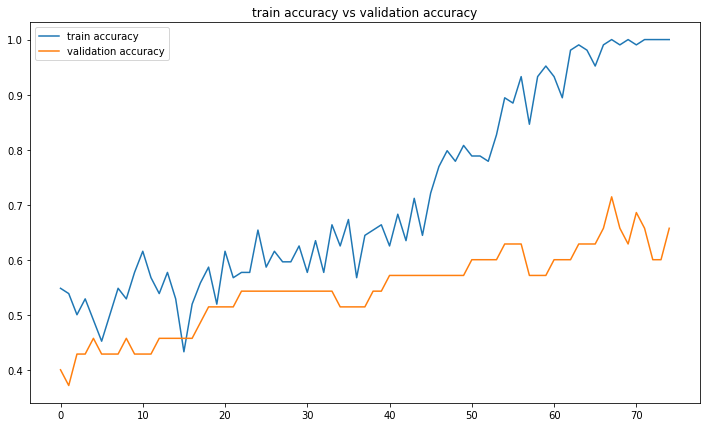

In [44]:
plt.figure(figsize = (12,7))

plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.title("train accuracy vs validation accuracy")
plt.legend()
plt.show()

LOSS

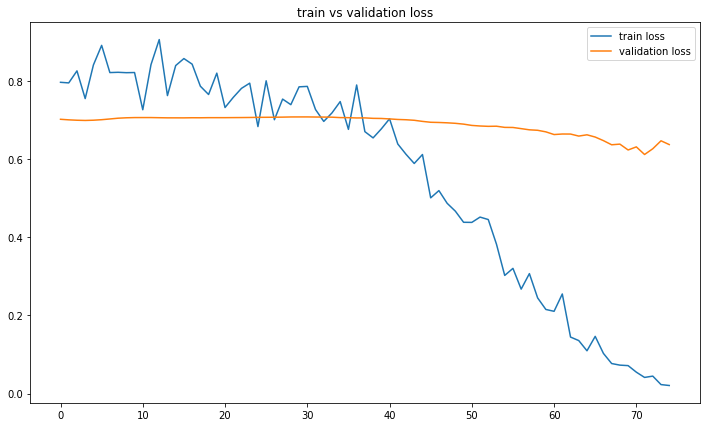

In [45]:
plt.figure(figsize = (12,7))

plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.title("train vs validation loss")
plt.show()

PREDICTION

In [46]:
def tumor(number):
    
    if number == 0:
        
        return "Not a tumor"
    
    else:
        
        return "a tumor"

TESTING

100.0% Confidence This Is a tumor


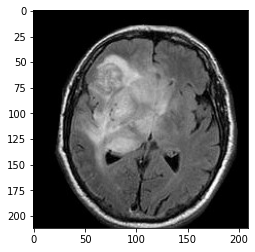

In [55]:
img = Image.open(r"/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/yes/Y2.jpg")

x = np.array(img.resize((128,128)))

x = x.reshape(1, 128, 128, 3)

result = model.predict([x])

classification = np.where(result == np.amax(result))[1][0]

print(str(result[0][classification]*100) + '% Confidence This Is ' + tumor(classification))

plt.imshow(img)

[3.116117974594802e-32, 1.0]
100.0% Confidence This Is Not a tumor


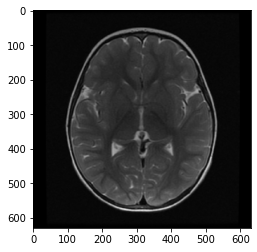

In [52]:
img2 = Image.open(r"/gdrive/MyDrive/Colab Notebooks/brain_tumour_detection/no/2 no.jpeg")

y = np.array(img2.resize((128,128)))

y = y.reshape(1, 128, 128, 3)

result2 = model.predict([y])

ind = 0
classification2 = 0

import numpy as np

for result in result2:
    result = result.tolist()
    print(result)
    
    if result[0] > result[1]:
        classification = 1
        ind = 0
    else:
        classification = 0
        ind = 1

#classification2 = np.where(result2 == np.amax(result2))[1][0]

print(str(result2[0][ind]*100) + '% Confidence This Is ' + tumor(classification2))

plt.imshow(img2)